# Midterm Exam - Machine Learning with Python

Due Time: November 23, 2023, at 12:00 AM

## *1*. Random Day Problem

###(a) Create a random date within the range of January 1, 2000, to December 31, 2023, following this format: for example, 2009-11-09.

In [119]:
# 1. (a)
import random
from datetime import date, timedelta

# 定義開始和結束日期
start_date = date(2000, 1, 1)
end_date = date(2023, 12, 31)

# 計算日期範圍
delta = end_date - start_date

random_days = random.randint(0, delta.days)

random_date = start_date + timedelta(days=random_days)

formatted_random_date = random_date.strftime("%Y-%m-%d")

print("Random Date:", formatted_random_date)


Random Date: 2008-01-30


###1.(b) Produce a one-month calendar for the year and month corresponding to the randomly generated date in (a), in this format: for example,

2009-11  生活日誌


2009-11-01（日）


2009-11-02（一）


2009-11-03（二）\
.\
.\
.

In [120]:
# 1. (b)
# Importing necessary modules
from datetime import date, timedelta
from calendar import monthrange

# 從(a)程式中獲取隨機日期
random_date = date(int(formatted_random_date[:4]), int(formatted_random_date[5:7]), int(formatted_random_date[8:]))

# 獲取隨機日期對應的年份和月份
year = random_date.year
month = random_date.month

# 輸出標題
print(f"{year}-{month:02d} 生活日誌")

# 獲取該月份的天數
days_in_month = monthrange(year, month)[1]

# 設定一個起始日期為該月的第一天
current_day = date(year, month, 1)

# 生成一個月的日曆
for day in range(1, days_in_month + 1):
    # 獲取星期幾（0代表星期一，6代表星期日）
    weekday = current_day.strftime("%w")

    # 根據星期幾獲取對應的星期幾名稱
    weekday_name = ("日", "一", "二", "三", "四", "五", "六")[int(weekday)]

    # 格式化日期
    formatted_day = current_day.strftime("%Y-%m-%d")

    # 輸出日期和對應的星期幾
    print(f"{formatted_day}（{weekday_name}）")

    # 更新日期為下一天
    current_day += timedelta(days=1)

2008-01 生活日誌
2008-01-01（二）
2008-01-02（三）
2008-01-03（四）
2008-01-04（五）
2008-01-05（六）
2008-01-06（日）
2008-01-07（一）
2008-01-08（二）
2008-01-09（三）
2008-01-10（四）
2008-01-11（五）
2008-01-12（六）
2008-01-13（日）
2008-01-14（一）
2008-01-15（二）
2008-01-16（三）
2008-01-17（四）
2008-01-18（五）
2008-01-19（六）
2008-01-20（日）
2008-01-21（一）
2008-01-22（二）
2008-01-23（三）
2008-01-24（四）
2008-01-25（五）
2008-01-26（六）
2008-01-27（日）
2008-01-28（一）
2008-01-29（二）
2008-01-30（三）
2008-01-31（四）


###1.(c) Produce a one-month calendar for the year and month corresponding to the randomly generated date in (a), in this format: for example,

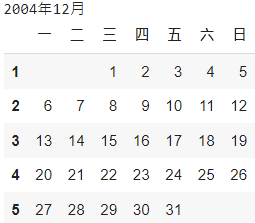

In [121]:
# 1. (c)
# Importing necessary modules
from datetime import date, timedelta
from calendar import monthrange
import pandas as pd
import math

# 取得隨機日期所在年份和月份
random_year = random_date.year
random_month = random_date.month

# 取得隨機日期所在月份的第一天和最後一天
first_day = date(random_year, random_month, 1)
last_day = date(random_year, random_month, monthrange(random_year, random_month)[1])

# 確定第一天是星期幾
first_weekday = first_day.weekday()

# 製作日曆 DataFrame
days_in_month = (last_day - first_day).days + 1
date_range = pd.date_range(start=first_day, end=last_day)
dates = [date.strftime("%d") for date in date_range]

padding_days = first_weekday
if padding_days != 0:
    padding_dates = ['' for _ in range(padding_days)]
    dates = padding_dates + dates

weeks = math.ceil(days_in_month / 7)
calendar_matrix = [dates[i * 7:(i + 1) * 7] if i < weeks - 1 else dates[i * 7:(i + 1) * 7] + ['' for _ in range(7 - len(dates[i * 7:(i + 1) * 7]))] for i in range(weeks)]

# 轉換為 DataFrame
calendar_df = pd.DataFrame(calendar_matrix, columns=["一", "二", "三", "四", "五", "六", "日"])

print(f"{last_day.strftime('%Y年%m月')}")
calendar_df

2008年01月


,一,二,三,四,五,六,日
0,,01,02,03,04,05,06
1,07,08,09,10,11,12,13
2,14,15,16,17,18,19,20
3,21,22,23,24,25,26,27
4,28,29,30,31,,,


###1.(d) A day that coincides with the 13th of the month and falls on a Friday is commonly regarded as an "unlucky" day in Western superstition. This particular day is given the special name "Friday the 13th." Determine the occurrences of "Friday the 13th" both before and after the randomly generated date in (a), in this format: for example,
2009-11-09（一）\
2009-03-13（五）\
2009-11-09（一）\
2009-11-13（五）

In [122]:
# (d)
from datetime import date, timedelta
import math

# 星期的中英對照
weekday_dict = {
    "Monday": "一",
    "Tuesday": "二",
    "Wednesday": "三",
    "Thursday": "四",
    "Friday": "五",
    "Saturday": "六",
    "Sunday": "日"
}

def find_friday_the_13th(date_obj, direction):
    if direction == "before":
        step = -1  # 往前檢查日期
    elif direction == "after":
        step = 1  # 往後檢查日期
    else:
        return "方向指定錯誤"

    current_date = date_obj
    while True:
        current_date += timedelta(days=step)
        if current_date.day == 13 and current_date.weekday() == 4:  # 檢查是否為星期五的 13 號
            return f"{date_obj}（{weekday_dict[date_obj.strftime('%A')]}）\n{current_date}（{weekday_dict[current_date.strftime('%A')]}）"

# 在指定日期前尋找 "Friday the 13th"
before_friday_13 = find_friday_the_13th(random_date, "before")
print(before_friday_13)

# 在指定日期後尋找 "Friday the 13th"
after_friday_13 = find_friday_the_13th(random_date, "after")
print(after_friday_13)



2008-01-30（三）
2007-07-13（五）
2008-01-30（三）
2008-06-13（五）


###1.(e) Determine the occurrences of the same day both before and after the randomly generated date in (a), in this format: for example,

The same day in the previous month: 2004-11-29\
The same day in the coming month: 2005-01-29

In [ ]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta


The same day in the previous month: 2004-11-29
The same day in the coming month: 2005-01-29
The same day in the previous month: 2019-12-30
The same day in the coming month: 2020-03-30


In [124]:
from datetime import date, timedelta

def find_same_day(date_obj, direction):
    if direction == "previous":
        delta = -1
    elif direction == "coming":
        delta = 1
    else:
        return "方向指定錯誤"

    target_date = date_obj + timedelta(days=delta * 31)

    # 檢查是否超出該月的範圍，並做適當調整
    while True:
        try:
            same_day = date(target_date.year, target_date.month, date_obj.day)
            break
        except ValueError:
            target_date -= timedelta(days=1)

    return same_day

# 找到指定日期之前的同一天日期
previous_same_day = find_same_day(random_date, "previous")
print('The same day in the previous month:', previous_same_day)

# 找到指定日期之後的同一天日期
coming_same_day = find_same_day(random_date, "coming")
print('The same day in the coming month:', coming_same_day)

The same day in the previous month: 2007-12-30
The same day in the coming month: 2008-03-30


## *2*. [GDP per hour worked](https://www.kaggle.com/datasets/joebeachcapital/gdp-per-hour-worked)

Data behind the Economist's article: Productivity has grown faster in western Europe than in America

CSV file:
gdp_over_hours_worked.csv

Sources

OECD, World Bank

https://www.kaggle.com/datasets/joebeachcapital/gdp-per-hour-worked


###2.(a) Find the names of columns with missing values.

In [22]:
#import necessary library to mount personal Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [48]:
import numpy as np
import pandas as pd
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/gdp_over_hours_worked.csv')
check_null = data.isnull().any()
has_missing = []
for i in range (len(check_null)):
  if list(check_null)[i] == True:
    has_missing.append(check_null.index[i])
print('the names of columns with missing values:')
has_missing


the names of columns with missing values:


['iso2c',
 'iso3c',
 'pop',
 'labor_force',
 'gdp_ppp_c',
 'gdp_ppp',
 'gdp',
 'gdp_c',
 'unemployment_r',
 'pop_over_65',
 'working_age_pop_pct',
 'employment_rate',
 'hours_worked',
 'total_hours',
 'hours_per_employed',
 'employed',
 'total_hours_alternative',
 'gdp_over_k_hours_worked',
 'gdp_ppp_over_k_hours_worked',
 'gdp_over_pop',
 'gdp_ppp_over_pop',
 'gdp_ppp_over_labor_force',
 'gdp_ppp_over_pop_c',
 'gdp_over_pop_c',
 'gdp_ppp_over_k_hours_worked_c']

###2.(b) List the different countries and regions in the column 'country' and find the number of the different countries and regions.

In [51]:
# 從 'country' 欄位中取得不同的國家和地區
unique_countries = data['country'].unique()

# 計算不同國家和地區的數量
num_unique_countries = len(unique_countries)

# 列印不同的國家和地區以及數量
print("不同的國家和地區有：")
print(unique_countries)
print("\n不同的國家和地區數量為：", num_unique_countries)

不同的國家和地區有：
['Arab World' 'World' 'East Asia & Pacific (excluding high income)'
 'Europe & Central Asia (excluding high income)' 'South Asia' 'Andorra'
 'United Arab Emirates' 'Afghanistan' 'Antigua and Barbuda' 'Albania'
 'Armenia' 'Angola' 'Argentina' 'American Samoa' 'Austria' 'Australia'
 'Aruba' 'Azerbaijan' 'Central Europe and the Baltics'
 'Bosnia and Herzegovina' 'Barbados' 'Bangladesh' 'Belgium' 'Burkina Faso'
 'Bulgaria' 'Bahrain' 'Burundi' 'Benin' 'Bermuda' 'Brunei Darussalam'
 'Bolivia' 'Brazil' 'Bahamas, The' 'Bhutan' 'Botswana' 'Belarus' 'Belize'
 'Canada' 'Congo, Dem. Rep.' 'Central African Republic' 'Congo, Rep.'
 'Switzerland' "Cote d'Ivoire" 'Chile' 'Cameroon' 'China' 'Colombia'
 'Costa Rica' 'Cuba' 'Cabo Verde' 'Curacao' 'Cyprus' 'Czechia' 'Germany'
 'Djibouti' 'Denmark' 'Dominica' 'Dominican Republic' 'Algeria' 'Ecuador'
 'Estonia' 'Egypt, Arab Rep.' 'Eritrea' 'Spain' 'Ethiopia'
 'European Union' 'Fragile and conflict affected situations' 'Finland'
 'Fiji' 'Micronesi

###2.(c) Generate a cross-tabulation (cross table) for two columns 'iso2c' and 'iso3c'.

In [53]:
# 建立交叉表
cross_table = pd.crosstab(data['iso2c'], data['iso3c'])

# 顯示交叉表
cross_table

iso3c,ABW,AFE,AFG,AFW,AGO,ALB,AND,ARB,ARE,ARG,...,VIR,VNM,VUT,WLD,WSM,XKX,YEM,ZAF,ZMB,ZWE
iso2c,,,,,,,,,,,,,,,,,,,,,
1A,0,0,0,0,0,0,0,43,0,0,...,0,0,0,0,0,0,0,0,0,0
1W,0,0,0,0,0,0,0,0,0,0,...,0,0,0,43,0,0,0,0,0,0
4E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8S,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZJ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZM,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,43,0
ZQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


###2.(d) List the data of the country 'Norway'.

In [55]:
# 篩選 'country' 欄位為 'Norway' 的資料
norway_data = data[data['country'] == 'Norway']

# 顯示 'Norway' 的資料
norway_data

,iso2c,year,country,iso3c,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
6579,NO,1980,Norway,NOR,4085620.0,NaN,NaN,NaN,6.443906e+10,1.643144e+11,...,1936000.0,NaN,21211.012755,NaN,15772.161079,NaN,NaN,NaN,40217.748173,NaN
6580,NO,1981,Norway,NOR,4099702.0,NaN,NaN,NaN,6.359656e+10,1.669407e+11,...,1961000.0,NaN,20783.190336,NaN,15512.484184,NaN,NaN,NaN,40720.214810,NaN
6581,NO,1982,Norway,NOR,4114787.0,NaN,NaN,NaN,6.264687e+10,1.673336e+11,...,1962000.0,NaN,20607.523676,NaN,15224.815280,NaN,NaN,NaN,40666.405120,NaN
6582,NO,1983,Norway,NOR,4128432.0,NaN,NaN,NaN,6.162752e+10,1.739818e+11,...,1958000.0,NaN,20399.709498,NaN,14927.585675,NaN,NaN,NaN,42142.336657,NaN
6583,NO,1984,Norway,NOR,4140099.0,NaN,NaN,NaN,6.205827e+10,1.845118e+11,...,1973000.0,NaN,20454.275495,NaN,14989.562294,NaN,NaN,NaN,44567.004681,NaN
6584,NO,1985,Norway,NOR,4152516.0,NaN,NaN,NaN,6.541663e+10,1.947585e+11,...,2028000.0,NaN,21061.373567,NaN,15753.491686,NaN,NaN,NaN,46901.324290,NaN
6585,NO,1986,Norway,NOR,4167354.0,NaN,NaN,NaN,7.869267e+10,2.026309e+11,...,2094000.0,NaN,24599.148063,NaN,18883.126952,NaN,NaN,NaN,48623.384687,NaN
6586,NO,1987,Norway,NOR,4186905.0,NaN,NaN,NaN,9.423061e+10,2.061840e+11,...,2138000.0,NaN,29373.630463,NaN,22506.029283,NaN,NaN,NaN,49244.963198,NaN
6587,NO,1988,Norway,NOR,4209488.0,NaN,NaN,NaN,1.019005e+11,2.056580e+11,...,2126000.0,NaN,31873.794640,NaN,24207.343377,NaN,NaN,NaN,48855.811406,NaN
6588,NO,1989,Norway,NOR,4226901.0,NaN,NaN,NaN,1.026339e+11,2.077932e+11,...,2066000.0,NaN,33107.720773,NaN,24281.130405,NaN,NaN,NaN,49159.703615,NaN


###2.(e) Find the following statistic for numerical columns.

count: Number of non-null values in each column.\
mean: Mean (average) of each column.\
std: Standard deviation, a measure of the spread of values.\
min: Minimum value in each column.\
25%: 25th percentile (first quartile).\
50%: Median (50th percentile or second quartile).\
75%: 75th percentile (third quartile).\
max: Maximum value in each column.

In [57]:
# 選擇數值型欄位，使用 describe() 方法計算統計數據
numeric_stats = data.describe()

# 顯示統計數據
numeric_stats

,year,pop,labor_force,gdp_ppp_c,gdp_ppp,gdp,gdp_c,unemployment_r,pop_over_65,working_age_pop_pct,...,employed,total_hours_alternative,gdp_over_k_hours_worked,gdp_ppp_over_k_hours_worked,gdp_over_pop,gdp_ppp_over_pop,gdp_ppp_over_labor_force,gdp_ppp_over_pop_c,gdp_over_pop_c,gdp_ppp_over_k_hours_worked_c
count,11560.000000,1.150700e+04,7.861000e+03,7.774000e+03,7.816000e+03,1.032200e+04,1.007800e+04,7623.000000,11517.000000,2236.000000,...,1.718000e+03,9.340000e+02,1695.000000,1436.000000,10322.000000,7816.000000,7304.000000,7774.000000,10078.000000,1436.000000
mean,2001.056228,2.471429e+08,1.304195e+08,3.280849e+12,2.937052e+12,1.507038e+12,1.786821e+12,8.073219,7.097829,65.831278,...,3.611168e+07,3.309809e+10,29418.919194,34270.538139,10463.766240,14881.493293,31482.118562,17044.809523,12032.907256,41450.681832
std,12.402936,7.954097e+08,3.967616e+08,1.054224e+13,1.007733e+13,6.115514e+12,6.462054e+12,5.712513,5.049777,3.340144,...,8.923382e+07,5.531914e+10,26106.410919,23598.924501,18560.435350,18251.548059,33788.905920,19222.376322,18737.352512,24587.410327
min,1980.000000,7.598000e+03,3.270400e+04,2.482164e+07,1.465840e+07,8.824746e+06,2.156211e+07,0.095000,0.171770,51.281287,...,1.110611e+05,2.542552e+08,3.096593,9.474523,22.850371,284.250421,605.072805,436.376416,165.934373,12.406395
25%,1990.000000,1.307206e+06,1.249457e+06,1.785945e+10,1.371533e+10,3.802561e+09,5.876908e+09,4.130000,3.293985,64.411816,...,2.449125e+06,3.836695e+09,9089.926685,17180.461906,941.049933,3048.578428,8025.509420,3699.080097,1508.107732,22967.012066
50%,2001.000000,7.863944e+06,4.674812e+06,1.000981e+11,8.562377e+10,2.511871e+10,3.771751e+10,6.476838,4.916974,66.256238,...,5.091772e+06,8.266769e+09,22525.195566,32172.506871,3059.074441,8073.917881,19490.218562,10010.717397,4064.820947,40938.805602
75%,2012.000000,5.078428e+07,3.192777e+07,1.041086e+12,8.746873e+11,3.161215e+11,4.360304e+11,10.557000,10.127006,67.861732,...,2.352300e+07,3.984082e+10,43431.007663,47490.340113,11171.862688,19557.269825,43107.793647,23448.813094,14240.171904,59101.060752
max,2022.000000,7.951150e+09,3.455349e+09,1.390333e+14,1.641553e+14,1.005620e+14,8.974581e+13,38.800000,35.970125,73.885367,...,6.588299e+08,2.788546e+11,138534.229164,152929.632512,234317.084818,163219.491990,274446.363413,157602.482546,204190.973407,137222.254006
